# Ridge Regression Prectical Implementation

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
# import sklearn row data 
from sklearn.datasets import fetch_california_housing

In [6]:
df = fetch_california_housing()

In [8]:
df

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [10]:
# load dataset in dataFrame

dataset = pd.DataFrame(df.data)

In [12]:
dataset

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [16]:
dataset.columns = df.feature_names

In [22]:
dataset.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25


In [24]:
# Step 3 : Indepndent features x and Dependent Features y
x = dataset
y = df.target

In [34]:

y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [38]:
# Step 4: Split the data into training and testing sets

from sklearn.model_selection import train_test_split

In [42]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [46]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14196,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03
8267,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,-118.16
17445,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,-120.48
14265,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69,-117.11
2271,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78,-119.80
...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96


In [66]:
# Step 5: Standardize the features
from sklearn.preprocessing import StandardScaler

In [68]:
# create sclaer object
scaler = StandardScaler()

In [70]:
X_train = scaler.fit_transform(X_train)

In [74]:
X_test = scaler.transform(X_test)

In [78]:
# Now x_train and x_test are scaled and ready for model training!
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (16512, 8)
Testing data shape: (4128, 8)


In [82]:
# Now Using Ridge Regression Create and Train the model
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV


In [84]:
ridge_regression = Ridge()

In [86]:
ridge_regression

Ridge()

In [92]:
parameters = {'alpha':[1,2,4,5,10,20,30,33,49,80,100,45]}
ridgecv = GridSearchCV(ridge_regression,parameters,scoring ='neg_mean_squared_error', cv=5)
ridgecv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 4, 5, 10, 20, 30, 33, 49, 80, 100,
                                   45]},
             scoring='neg_mean_squared_error')

In [94]:
print(ridgecv.best_params_)

{'alpha': 1}


In [98]:
print(ridgecv.best_score_)

-0.5192653140005424


In [100]:
ridge_pred = ridgecv.predict(X_test)

In [102]:
ridge_pred

array([0.71947224, 1.76384666, 2.709309  , ..., 4.46847645, 1.18797174,
       2.00922052])

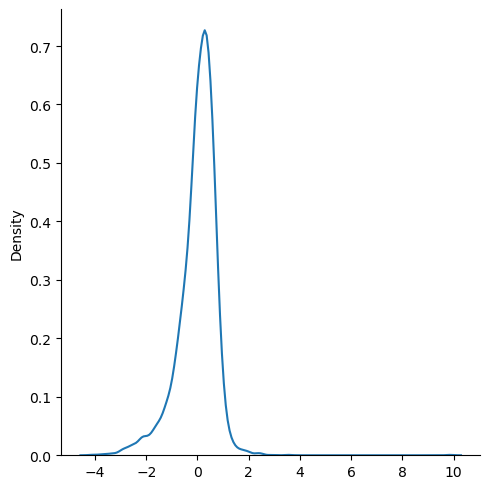

In [108]:
import seaborn as sns
sns.displot(ridge_pred - y_test, kind = 'kde')